In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

Файл Ch62data.xlsx содержит квартальные доходы GM, Ford и GE. Постройте кривую скользящей средней за четыре квартала для доходов каждой компании. Опишите, что можно узнать по каждой кривой тренда.

In [4]:
stocks = pd.read_excel('~/Study/excel/Ch62/Practice Files/Ch62data.xlsx',
                       skiprows=1, usecols=range(1,6), names=['Year', 'Quater', 'GM', 'F', 'GE']).dropna()

In [6]:
stocks.head()

,Year,Quater,GM,F,GE
0,1991,1,29.2,21.34,13.33
1,1991,2,31.3,23.85,14.77
2,1991,3,28.9,21.12,14.58
3,1991,4,33.6,21.98,17.55
4,1992,1,32.0,24.56,12.43


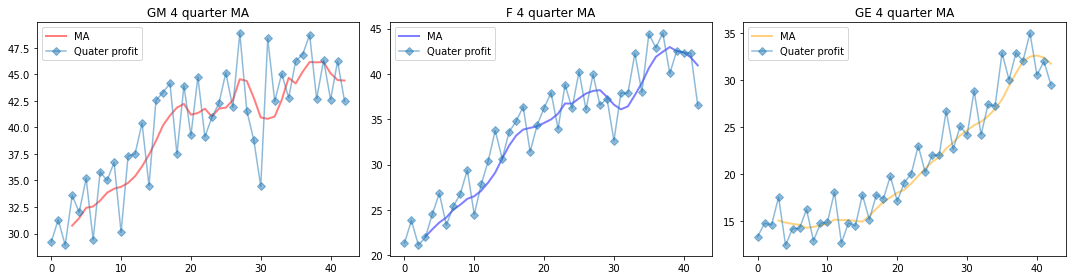

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
colors = iter(('red','blue','orange'))

for i, tikr in enumerate(['GM', 'F', 'GE']):
    
    stocks[tikr].rolling(window=4).mean().plot(color=next(colors),
                                               ax=ax[i], alpha=.5,
                                               linewidth=2, label='MA')
    stocks[tikr].plot(ax=ax[i], style='D-', alpha=.5, label='Quater profit')
    ax[i].set_title(f'{tikr} 4 quarter MA')
    ax[i].legend()

plt.tight_layout()
plt.show()

**GM**
Тенденция роста продаж до 21 квартала (1996 г.) спад в MA. Около 30 квартала очевиден очередной спад.

**F**
Спад очевиден с 29 квартала МА (в течение 1998 г.). Квартал 39 MA (2000) указывает на еще один спад.

**GE**
41 квартал MA указывает на небольшое падение после сильного 10-летнего роста.

## Метод Винтерса

Часто необходимо предсказать будущие значения временного ряда, такие как ежемесячные расходы или ежемесячная выручка от продукта. Как правило, это вызывает затруднения, поскольку характеристики любого временного ряда постоянно меняются. В большинстве случаев для прогнозирования будущих значений временного ряда рекомендуется применять методы сглаживания или адаптивные методы. В этой главе обсуждается самый мощный метод сглаживания — метод Олта Винтерса. Для ознакомления с методом Винтерса рассмотрим прогнозирование ежемесячного объема строительства нового жилья в США. Объем строительства нового жилья — это просто количество новых домов, строительство которых началось в течение месяца. Начнем с описания трех ключевых характеристик временных рядов.

### Характеристики временных рядов

Поведение большинства временных рядов можно объяснить тремя характеристиками: база, тренд и сезонность.

- 􏰀База ряда описывает текущийуровень ряда в отсутствие какой-либо сезонности. Например, предположим, что базовый уровень объема строительства нового жилья в США равен 160 000 домов. В этом случае, если текущий месяц был средним месяцем относительно других месяцев года, можно считать, что объем нового строительства составит 160 000 домов.
􏰀
- Тренд временного ряда — это процентное увеличение базы за период. Таким образом, тренд 1,02 означает, что, согласно оценке, объем нового строительства увеличивается на 2% каждый месяц.
􏰀
- Сезонность (индекс сезонности) для периода говорит о том, насколько больше или меньше типичного ожидаемый ежемесячный объем нового строительства. Например, если индекс сезонности декабря составляет 0,8, то декабрьский объем нового строительства на 20% меньше типичного ежемесячного объема. Если индекс сезонности июня составляет 1,3, то июньский объем нового строительства на 30% больше типичного ежемесячного объема.

### Определение параметров

На основе всех данных, полученных в результате наблюдения в течение месяца t, вычисляются следующие представляющие интерес величины:

- $L_{t}$ — уровень ряда;
- $T_{t}$ — тренд ряда;
- $S_{t}$ — индекс сезонности для текущего месяца.

Ключом к методу Винтерса являются следующие три уравнения, с помощью которых обновляются величины $L_{t}$, $T_{t}$ и $S_{t}$. В следующих формулах $\alpha$, $\beta$ и $\gamma$ — это сглаживающие постоянные. Значения этих постоянных выбираются с целью оптимизации прогнозов. В следующих формулах c равно числу периодов в сезонном цикле (например, $c = 12$ месяцев), а $x_{t}$ равно наблюдаемому значению временного ряда в момент $t$.


$$\begin{align}
L_t &= \alpha\frac{x_t}{s_{t-c}} + (1-\alpha) (L_{t-1} T_{t-1}) \\
T_t &= \beta\frac{L_t}{L_{t-1}} + (1-\beta)T_{t-1} \\
T_t &= \gamma\frac{x_t}{L_t} + (1-\gamma)S_{t-c}
\end{align}$$

Формула 1 показывает, что новая оценка базы равна взвешенному среднему текущего наблюдения (с исключенной сезонной составляющей) и базы предыдущего периода, обновленной в соответствии с последней оценкой тренда. Формула 2 показывает, что новая оценка тренда равна взвешенному среднему отношения текущей базы к базе предыдущего периода (это текущая оценка тренда) и тренда предыдущего периода. Формула 3 показывает, что обновленная оценка индекса сезонности равна взвешенному среднему оценки индекса сезонности, основанного на текущем периоде, и предыдущей оценки. Обратите внимание, что большие значения параметров сглаживания соответствуют большему весу текущего наблюдения.

$F_{t,k}$ можно определить как прогноз $F$ после периода $t$ для периода $t + k$. Таким образом, $F_{t,k} = L_t T_t^k S_{t + k - c}$ (4).
По этой формуле сначала с помощью текущей оценки тренда обновляется база на $k$ периодов вперед. Затем получившаяся в результате оценка базы для периода $t + k$ корректируется соответствующим индексом сезонности.

***
Данные для всех заданий находятся в файле Quarterly.xlsx.

С помощью метода Винтерса спрогнозируйте доходы Apple на один квартал вперед.

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [326]:
stocks = pd.read_excel('~/Study/excel/Ch63/Practice Files/Quarterly.xlsx',
                       skiprows=4, usecols=range(2,6), names=['Year', 'Quater', 'Q', 'Price'])

In [327]:
stocks.head()

,Year,Quater,Q,Price
0,1980,1,19794,19.540
1,1980,2,19801,23.550
2,1980,3,19802,32.569
3,1980,4,19803,41.467
4,1981,1,19804,67.621


In [329]:
stocks.Year = pd.to_datetime(stocks.Year, format='%Y')

In [330]:
q = pd.period_range(stocks['Year'].min(), freq='Q', periods=len(stocks['Year']))
stocks.index = q

In [337]:
df_train

2004Q3    2014.0
2004Q4    2350.0
2005Q1    3490.0
2005Q2    3243.0
2005Q3    3520.0
2005Q4    3678.0
Freq: Q-DEC, Name: Price, dtype: float64

In [338]:
df_train = stocks.iloc[:, 3]
# df_test = stocks.iloc[-4:, 3]

In [339]:
df_test = pd.period_range(df_train.index.max(), freq='Q', periods=2)

In [340]:
model = HWES(df_train, seasonal_periods=3, trend='add', seasonal='mul', damped=True)
fitted = model.fit(optimized=True, use_boxcox=False, remove_bias=False, use_brute=True)

In [341]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  104
Model:             ExponentialSmoothing   SSE                        7365687.155
Optimized:                         True   AIC                           1177.467
Trend:                         Additive   BIC                           1198.622
Seasonal:                Multiplicative   AICC                          1179.833
Seasonal Periods:                     3   Date:                 Thu, 03 Jun 2021
Box-Cox:                          False   Time:                         18:33:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5707144                alpha                 True
smoothing_trend          

In [342]:
pred = fitted.predict(start=df_test[0], end=df_test[-1]) # fitted.forecast(steps=4)

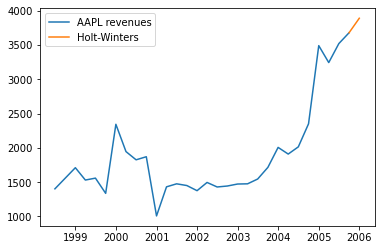

In [343]:
plt.plot(stocks.iloc[-30:, 3].index.to_timestamp(), stocks.iloc[-30:, 3], label='AAPL revenues')
plt.plot(pred.index.to_timestamp(), pd.concat([stocks.iloc[-1:, 3], pred.iloc[-1:]]), label='Holt-Winters')
plt.legend(loc='best');

С помощью метода Винтерса спрогнозируйте доходы Amazon.com на один квартал вперед.

In [354]:
stocks = pd.read_excel('~/Study/excel/Ch63/Practice Files/Quarterly.xlsx',
                       skiprows=4, usecols=range(2,5), index_col=0, sheet_name='AMZ')

In [394]:
stocks.index.name = 'Quarter'
stocks.head(10)

,Sales (in million $)
Quarter,
1996-03-31,0.875
1996-06-30,2.230
1996-09-30,4.200
1996-12-31,8.500
1997-03-31,16.005
1997-06-30,27.855
1997-09-30,37.900
1997-12-31,66.040
1998-03-31,87.395


In [475]:
q = pd.period_range(stocks.index[0], freq='Q', periods=(len(stocks.index)))

In [476]:
stocks.index = q

In [482]:
df_train = stocks.iloc[:, 0]
df_test = pd.period_range(df_train.index.max(), freq='Q', periods=2)
df_test

PeriodIndex(['2005Q2', '2005Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [483]:
model = HWES(df_train, seasonal_periods=4, trend='add', seasonal='mul', damped=True)
fitted = model.fit(optimized=True, use_boxcox=False, remove_bias=False, use_brute=True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:     Sales (in million $)   No. Observations:                   38
Model:             ExponentialSmoothing   SSE                         155333.053
Optimized:                         True   AIC                            333.998
Trend:                         Additive   BIC                            348.736
Seasonal:                Multiplicative   AICC                           344.152
Seasonal Periods:                     4   Date:                 Thu, 03 Jun 2021
Box-Cox:                          False   Time:                         19:40:11
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3584585                alpha                 True
smoothing_trend          

In [485]:
pred = fitted.predict(start=df_test[0].to_timestamp(), end=df_test[-1].to_timestamp()) # fitted.forecast(steps=4)

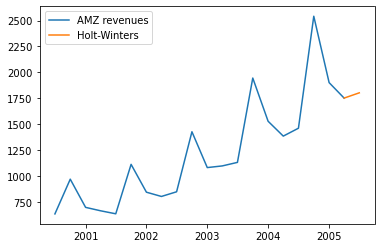

In [491]:
plt.plot(stocks.iloc[-20:, 0].index.to_timestamp(), stocks.iloc[-20:, 0], label='AMZ revenues')
plt.plot(pred.index.to_timestamp(), pd.concat([stocks.iloc[-1:, 0], pred.iloc[-1:]]), label='Holt-Winters')
plt.legend(loc='best');

***
С помощью метода Винтерса спрогнозируйте доходы Home Depot на один квартал вперед.

In [495]:
stocks = pd.read_excel('~/Study/excel/Ch63/Practice Files/Quarterly.xlsx',
                       skiprows=7, usecols=range(3,6), index_col=0, sheet_name='home depot')

In [535]:
q = pd.period_range(stocks.index.astype(str) \
                          .str.extract(r'(\d{4})') \
                          .apply(pd.to_datetime) \
                          .iloc[0][0], freq='Q-DEC', periods=len(stocks.index))

In [537]:
stocks.index = q

In [538]:
df_train = stocks.iloc[:, 0]
df_test = pd.period_range(df_train.index.max(), freq='Q', periods=2)
df_test

PeriodIndex(['2005Q4', '2006Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [539]:
model = HWES(df_train, seasonal_periods=4, trend='add', seasonal='mul', damped=True)
fitted = model.fit(optimized=True, use_boxcox=False, remove_bias=False, use_brute=True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:          homedepot sales   No. Observations:                  100
Model:             ExponentialSmoothing   SSE                        8965227.751
Optimized:                         True   AIC                           1158.369
Trend:                         Additive   BIC                           1181.816
Seasonal:                Multiplicative   AICC                          1161.369
Seasonal Periods:                     4   Date:                 Thu, 03 Jun 2021
Box-Cox:                          False   Time:                         22:22:31
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6772857                alpha                 True
smoothing_trend          

In [540]:
pred = fitted.predict(start=df_test[0].to_timestamp(), end=df_test[-1].to_timestamp())

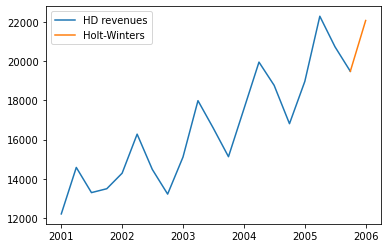

In [553]:
plt.plot(stocks.iloc[-20:, 0].index.to_timestamp(), stocks.iloc[-20:, 0], label='HD revenues')
plt.plot(pred.index.to_timestamp(), pd.concat([stocks.iloc[-1:, 0], pred.iloc[-1:]]), label='Holt-Winters')
# plt.xlabel([x.__str__() for x in stocks.iloc[-20:, 0].index])
plt.legend(loc='best');

***
С помощью метода Винтерса спрогнозируйте суммарный доход Home Depot для следующих двух кварталов.

In [555]:
df_test = pd.period_range(df_train.index.max(), freq='Q', periods=3)
pred = fitted.predict(start=df_test[0].to_timestamp(), end=df_test[-1].to_timestamp())

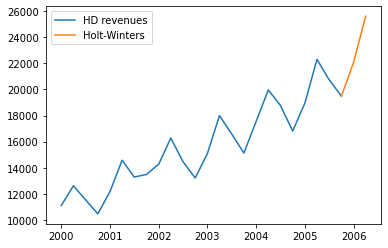

In [561]:
plt.plot(stocks.iloc[-24:, 0].index.to_timestamp(), stocks.iloc[-24:, 0], label='HD revenues')
plt.plot(pred.index.to_timestamp(), pd.concat([stocks.iloc[-1:, 0], pred.iloc[-2:]]), label='Holt-Winters')
plt.legend(loc='best');

## Метод прогнозирования "по отношению к скользящему среднему"

Часто для прогнозирования будущих ежеквартальных доходов корпорации или ежемесячных объемов продаж продукта требуется простой точный метод. Для та- ких ситуаций подходит точный и простой в использовании метод прогнозирования "по отношению к скользящему среднему".

**Каков тренд временного ряда?**

Например, тренд 10 единиц продукции за квартал означает, что объем продаж уве- личивается на 10 единиц продукции за квартал, а тренд –5 единиц продукции за квартал означает, что объем продаж имеет тенденцию к снижению на 5 единиц в квартал.

**Как определить индексы сезонности для временного ряда?**
Известно, что компания Walmart ожидает большое увеличение объемов продаж в четвертом квартале года (благодаря праздникам). Если это не учесть, трудно составить точный прогноз квартальных доходов компании Walmart. Более полно представить модель продаж компании позволяют индексы сезонности. Квартальные индексы сезонности для доходов Walmart:
- квартал 1 (январь–март): 0,90;
- квартал 2 (апрель–июнь): 0,98;
- квартал 3 (июль–сентябрь): 0,96;
- квартал 4 (октябрь–декабрь): 1,16.

Эти индексы означают, например, что объем продаж в четвертом квартале, как правило, на 16% выше, чем объем продаж для квартала в среднем. Индексы сезонности должны быть в среднем равны 1.

**Существует ли простой способ включения тренда и сезонности в прогнозирование будущих объемов продаж продукта?**

Теперь давайте обратимся к простому методу прогнозирования "по отношению к скользящему среднему". Этот метод позволяет быстро вычислить тренд и индексы сезонности временного ряда и упрощает генерацию прогноза будущих значений временного ряда. 